In [0]:
#importando as bibliotecas necessárias para o experimento:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install scikit-plot
import utils

In [0]:
base_datapath = "drive/My Drive/IF702 - Redes Neurais/dataset"
train = pd.read_csv(base_datapath + "/trainDefault", sep="\t")
validation = pd.read_csv(base_datapath + "/validation", sep="\t")
test = pd.read_csv(base_datapath + "/testDefault", sep="\t")

In [0]:
#Para os datasets modificados:
base_datapath = "drive/My Drive/IF702 - Redes Neurais/dataset"
train = pd.read_csv("train_t", sep="\t")
validation = pd.read_csv("validation_t", sep="\t")
test = pd.read_csv("test_t", sep="\t")
#test = pd.read_csv(base_datapath + "/testDefault", sep="\t")

In [47]:
train.shape, validation.shape, test.shape

((255098, 247), (130822, 247), (127550, 247))

In [0]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = (train.iloc[:, 2:-2].values,
    train.iloc[:, -1].values,
    validation.iloc[:, 2:-2].values,
    validation.iloc[:, -1].values,
    test.iloc[:, 2:-2].values,
    test.iloc[:, -1].values) 

In [36]:
X_train.shape

(93016, 230)

In [0]:
X_train_val = np.append(X_train, X_val, axis=0)
Y_train_val = np.append(Y_train, Y_val, axis=0)

In [0]:
from xgboost import XGBClassifier

In [39]:
#RODANDO NO DATASET MODIFICADO:
xgb_clf7 = XGBClassifier(n_estimators=200, max_depth = 9, max_features = 70, n_jobs=-1)
xgb_clf7.fit(X_train_val, Y_train_val)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9, max_features=70,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

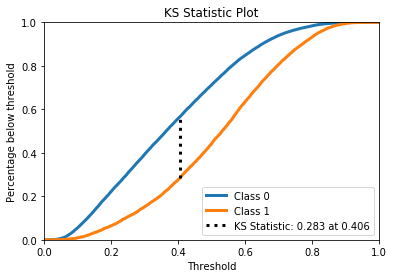


Accuracy:         0.6350
Recall:           0.5587
Precision:        0.6593
F1:               0.6049
AUROC:            0.6947
AUPR:             0.6771


In [40]:
xgb_clf7_pred_class = xgb_clf7.predict(X_test)
xgb_clf7_pred_scores = xgb_clf7.predict_proba(X_test)
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(Y_test , xgb_clf7_pred_class, xgb_clf7_pred_scores)
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [41]:
#RODANDO NO DATASET MODIFICADO
xgb_clf8 = XGBClassifier(n_estimators=200, max_depth = 7, max_features = 70, n_jobs=-1)
xgb_clf8.fit(X_train_val, Y_train_val)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7, max_features=70,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

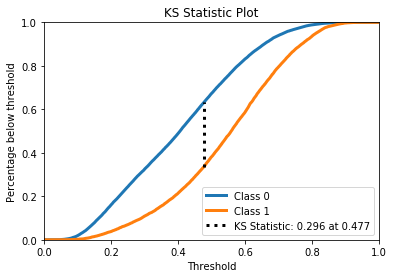


Accuracy:         0.6457
Recall:           0.6186
Precision:        0.6541
F1:               0.6358
AUROC:            0.7026
AUPR:             0.6889


In [42]:
xgb_clf8_pred_class = xgb_clf8.predict(X_test)
xgb_clf8_pred_scores = xgb_clf8.predict_proba(X_test)
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(Y_test , xgb_clf8_pred_class, xgb_clf8_pred_scores)
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [0]:
xgb_clf1 = XGBClassifier(random_state=13, n_jobs=-1)
xgb_clf1.fit(X_train_val, Y_train_val)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=13,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

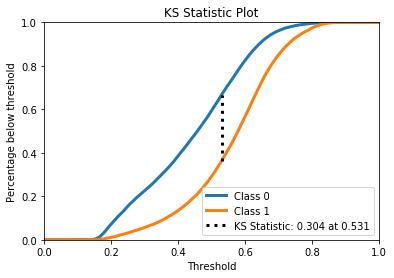


Accuracy:         0.6512
Recall:           0.7090
Precision:        0.6355
F1:               0.6702
AUROC:            0.7101
AUPR:             0.6929


In [0]:
xgb_clf1_pred_class = xgb_clf1.predict(X_test)
xgb_clf1_pred_scores = xgb_clf1.predict_proba(X_test)
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(Y_test, xgb_clf1_pred_class, xgb_clf1_pred_scores)
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [0]:
xgb_clf2 = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.001, 
                         max_features=100, n_jobs=-1, random_state=13)
xgb_clf2.fit(np.append(X_train, X_val, axis=0), np.append(Y_train, Y_val, axis=0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=8,
              max_features=100, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=13, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

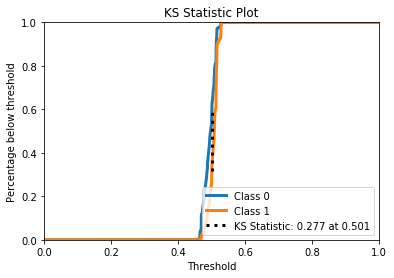


Accuracy:         0.6370
Recall:           0.7449
Precision:        0.6127
F1:               0.6724
AUROC:            0.6886
AUPR:             0.6595


In [0]:
xgb_clf2_pred_class = xgb_clf2.predict(X_test)
xgb_clf2_pred_scores = xgb_clf2.predict_proba(X_test)
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(Y_test, xgb_clf2_pred_class, xgb_clf2_pred_scores)
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [0]:
xgb_clf3 = XGBClassifier(n_estimators=100, max_depth=7, learning_rate=0.01, max_features=50)
xgb_clf3.fit(np.append(X_train, X_val, axis=0), np.append(Y_train, Y_val, axis=0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              max_features=50, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

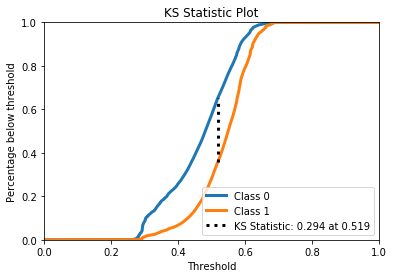


Accuracy:         0.6463
Recall:           0.7196
Precision:        0.6276
F1:               0.6705
AUROC:            0.7026
AUPR:             0.6794


In [0]:
xgb_clf3_pred_class = xgb_clf3.predict(X_test)
xgb_clf3_pred_scores = xgb_clf3.predict_proba(X_test)
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(Y_test, xgb_clf3_pred_class, xgb_clf3_pred_scores)
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [15]:
from mlxtend.classifier import EnsembleVoteClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
eclf1 = EnsembleVoteClassifier(clfs=[xgb_clf1, xgb_clf2, xgb_clf3], weights=[1,1,1],
                               refit=False, voting='soft')
eclf1.fit(X_train, Y_train)

EnsembleVoteClassifier(clfs=[XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=13, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           se...
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                   

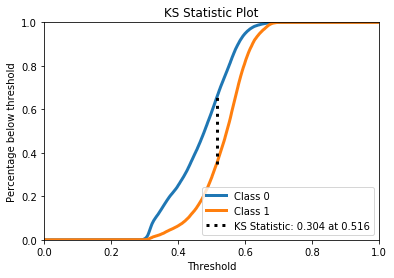


Accuracy:         0.6507
Recall:           0.7157
Precision:        0.6333
F1:               0.6720
AUROC:            0.7099
AUPR:             0.6907


In [0]:
eclf1_pred_class = eclf1.predict(X_test)
eclf1_pred_scores = eclf1.predict_proba(X_test)
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(Y_test, eclf1_pred_class, eclf1_pred_scores)
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [0]:
xgb_clf4 = XGBClassifier(n_estimators=200, max_depth = 5, max_features = 50, n_jobs=-1)
xgb_clf4.fit(np.append(X_train, X_val, axis=0), np.append(Y_train, Y_val, axis=0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5, max_features=50,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

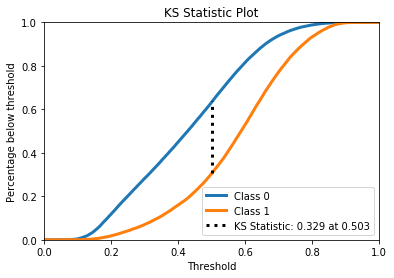


Accuracy:         0.6642
Recall:           0.6963
Precision:        0.6542
F1:               0.6746
AUROC:            0.7253
AUPR:             0.7089


In [0]:
xgb_clf4_pred_class = xgb_clf4.predict(X_test)
xgb_clf4_pred_scores = xgb_clf4.predict_proba(X_test)
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(Y_test, xgb_clf4_pred_class, xgb_clf4_pred_scores)
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [0]:
eclf2 = EnsembleVoteClassifier(clfs=[xgb_clf1, xgb_clf2, xgb_clf3, xgb_clf4], 
                               weights=[1,1,1,1], refit=False, voting='soft')
eclf2.fit(X_train, Y_train)

EnsembleVoteClassifier(clfs=[XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=13, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           se...
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
  

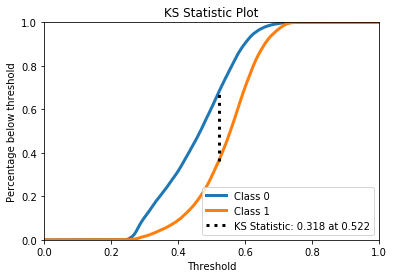


Accuracy:         0.6580
Recall:           0.7102
Precision:        0.6431
F1:               0.6750
AUROC:            0.7188
AUPR:             0.7008


In [0]:
eclf2_pred_class = eclf2.predict(X_test) 
eclf2_pred_scores = eclf2.predict_proba(X_test) 
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(Y_test, eclf2_pred_class, eclf2_pred_scores) 
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=5, max_features=50, n_jobs=-1)
rf_clf.fit(np.append(X_train, X_val, axis=0), np.append(Y_train, Y_val, axis=0))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=50, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

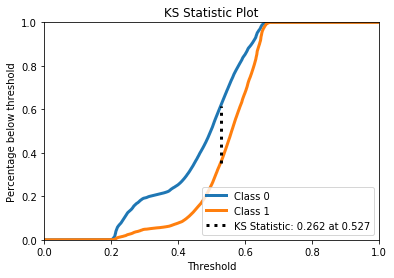


Accuracy:         0.6274
Recall:           0.7474
Precision:        0.6028
F1:               0.6673
AUROC:            0.6802
AUPR:             0.6547


In [13]:
rf_clf_pred_class = rf_clf.predict(X_test) 
rf_clf_pred_scores = rf_clf.predict_proba(X_test) 
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(Y_test, rf_clf_pred_class, rf_clf_pred_scores) 
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [0]:
eclf3 = EnsembleVoteClassifier(clfs=[xgb_clf1, xgb_clf2, xgb_clf3, xgb_clf4, rf_clf], 
                               weights=[1,1,1,2,1], refit=False, voting='soft')
eclf3.fit(X_train, Y_train)

EnsembleVoteClassifier(clfs=[XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=13, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           se...
                             RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
               

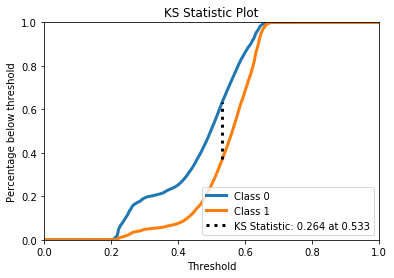


Accuracy:         0.6584
Recall:           0.7149
Precision:        0.6423
F1:               0.6767
AUROC:            0.6821
AUPR:             0.6576


In [0]:
eclf3_pred_class = eclf3.predict(X_test) 
eclf3_pred_scores = eclf3.predict_proba(X_test) 
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(Y_test, eclf3_pred_class, rf_clf_pred_scores) 
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [0]:
xgb_clf5 = XGBClassifier(n_estimators=200, max_depth = 7, max_features = 70, n_jobs=-1)
xgb_clf5.fit(X_train_val, Y_train_val)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7, max_features=70,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

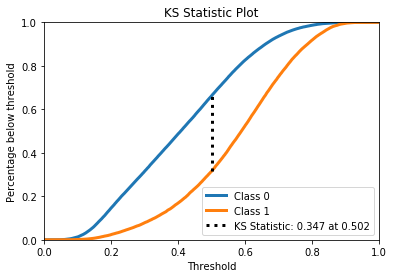


Accuracy:         0.6735
Recall:           0.6851
Precision:        0.6695
F1:               0.6772
AUROC:            0.7366
AUPR:             0.7214


In [0]:
xgb_clf5_pred_class = xgb_clf5.predict(X_test)
xgb_clf5_pred_scores = xgb_clf5.predict_proba(X_test)
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(
    Y_test, xgb_clf5_pred_class, xgb_clf5_pred_scores)
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [29]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.neural_network import MLPClassifier

Using TensorFlow backend.


input_dim:  243


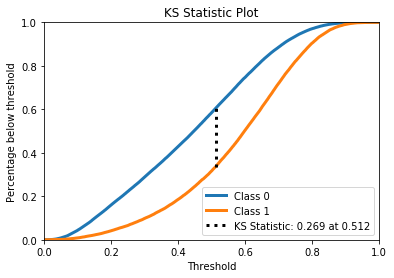


Accuracy:         0.6339
Recall:           0.6838
Precision:        0.6218
F1:               0.6513
AUROC:            0.6841
AUPR:             0.6634


In [38]:
input_dim = X_train.shape[1]
print("input_dim: ", input_dim)

mlp = MLPClassifier(hidden_layer_sizes=(40,20,), activation='relu', solver='adam',
                   max_iter=200, random_state=13, early_stopping=True,
                   validation_fraction=0.25, verbose=False)


mlp.fit(X_train, Y_train)

mlp_pred_class = mlp.predict(X_test)
mlp_pred_scores = mlp.predict_proba(X_test)
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(
    Y_test, mlp_pred_class, mlp_pred_scores)
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Matriz de confusão no conjunto de teste:
[[43159 20616]
 [26619 37156]]

Train Loss:       0.6480
Validation Loss:  0.6443

Performance no conjunto de teste:


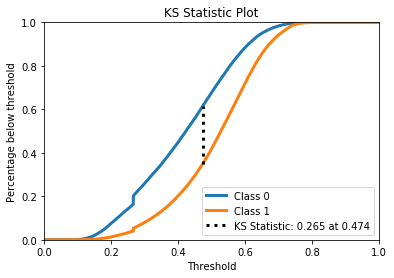


Accuracy:         0.6297
Recall:           0.5826
Precision:        0.6431
F1:               0.6114
AUROC:            0.6831
AUPR:             0.6595


In [0]:
utils.results_summary(history, Y_test, y_pred_class, y_pred_scores)

In [0]:
xgb_clf6 = XGBClassifier(n_estimators=200, max_depth = 9, max_features = 70, n_jobs=-1)
xgb_clf6.fit(X_train_val, Y_train_val)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9, max_features=70,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

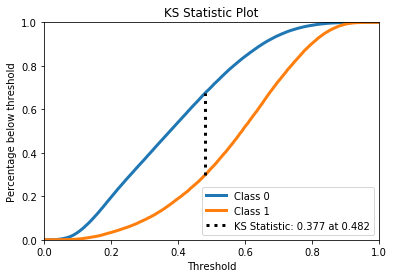


Accuracy:         0.6868
Recall:           0.6700
Precision:        0.6933
F1:               0.6814
AUROC:            0.7543
AUPR:             0.7426


In [0]:
xgb_clf6_pred_class = xgb_clf6.predict(X_test)
xgb_clf6_pred_scores = xgb_clf6.predict_proba(X_test)
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(
    Y_test, xgb_clf6_pred_class, xgb_clf6_pred_scores)
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [8]:
xgb_clf9 = XGBClassifier(n_estimators=300, max_depth = 13, max_features = 90, n_jobs=-1)
xgb_clf9.fit(X_train_val, Y_train_val)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=13,
              max_features=90, min_child_weight=1, missing=None,
              n_estimators=300, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

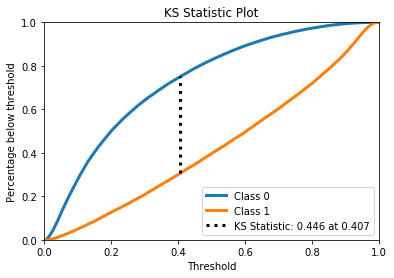


Accuracy:         0.7156
Recall:           0.6040
Precision:        0.7777
F1:               0.6799
AUROC:            0.7993
AUPR:             0.8073


In [10]:
xgb_clf9_pred_class = xgb_clf9.predict(X_test)
xgb_clf9_pred_scores = xgb_clf9.predict_proba(X_test)
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(
    Y_test, xgb_clf9_pred_class, xgb_clf9_pred_scores)
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [18]:
rf_clf2 = RandomForestClassifier(n_estimators=300, max_depth=13, max_features=90, n_jobs=-1)
rf_clf2.fit(X_train_val, Y_train_val)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features=90, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

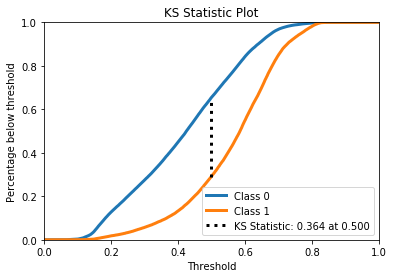


Accuracy:         0.6818
Recall:           0.7088
Precision:        0.6725
F1:               0.6902
AUROC:            0.7435
AUPR:             0.7227


In [19]:
rf_clf2_pred_class = rf_clf2.predict(X_test) 
rf_clf2_pred_scores = rf_clf2.predict_proba(X_test) 
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(Y_test, rf_clf2_pred_class, rf_clf2_pred_scores) 
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [45]:
eclf4 = EnsembleVoteClassifier(clfs=[xgb_clf9, rf_clf, rf_clf2, mlp], 
                               weights=[1,1,1,1], refit=False, voting='soft')
eclf4.fit(X_train, Y_train)

EnsembleVoteClassifier(clfs=[XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=13, max_features=90,
                                           min_child_weight=1, missing=None,
                                           n_estimators=300, n_jobs=-1,
                                           nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale...
                                           beta_2=0.999, early_stopping=True,
                                           epsilon=1e-08,
                  

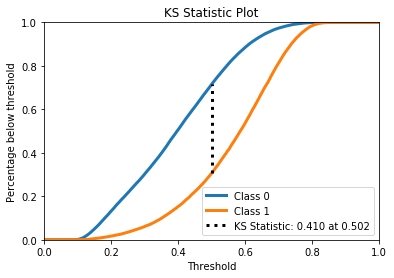


Accuracy:         0.7042
Recall:           0.6944
Precision:        0.7083
F1:               0.7013
AUROC:            0.7741
AUPR:             0.7678


In [46]:
eclf4_pred_class = eclf4.predict(X_test) 
eclf4_pred_scores = eclf4.predict_proba(X_test) 
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(Y_test, eclf4_pred_class, eclf4_pred_scores) 
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)